# Lab | Clustering songs 

## GROUP 4

In [46]:
import pandas as pd
pd.options.mode.chained_assignment = None

### 1. Concatenating

In [2]:
!ls files_for_lab

hot_songs_final.csv     not_hot_songs_final.csv


In [3]:
hot_songs = pd.read_csv('files_for_lab/hot_songs_final.csv')
not_hot_songs = pd.read_csv('files_for_lab/not_hot_songs_final.csv')

In [4]:
not_hot_songs['source'] = 'N'
hot_songs['source'] = 'H'

In [5]:
data = pd.concat([hot_songs,not_hot_songs]).reset_index()
data = data.drop(['index'], axis=1)

In [6]:
display(data.head(2))
display(data.tail(2))
display(data.shape)

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,source
0,Kill Bill,SZA,2ty6DmPnxVPpEFuB23XM0x,0.678,0.798,10,-5.195,1,0.0316,0.0383,...,0.509,99.941,audio_features,2ty6DmPnxVPpEFuB23XM0x,spotify:track:2ty6DmPnxVPpEFuB23XM0x,https://api.spotify.com/v1/tracks/2ty6DmPnxVPp...,https://api.spotify.com/v1/audio-analysis/2ty6...,137528,4,H
1,Creepin',"Metro Boomin, The Weeknd & 21 Savage",4CpujwKsq4DxOIMiKr12m8,0.728,0.293,1,-13.657,0,0.0562,0.4790,...,0.152,98.302,audio_features,4CpujwKsq4DxOIMiKr12m8,spotify:track:4CpujwKsq4DxOIMiKr12m8,https://api.spotify.com/v1/tracks/4CpujwKsq4Dx...,https://api.spotify.com/v1/audio-analysis/4Cpu...,217026,4,H


,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,source
3093,Who Want The Smoke?,Lil Yachty,3cou2znTV9n60FALU7NFiD,0.692,0.636,2,-10.036,1,0.0703,0.000427,...,0.366,140.007,audio_features,3cou2znTV9n60FALU7NFiD,spotify:track:3cou2znTV9n60FALU7NFiD,https://api.spotify.com/v1/tracks/3cou2znTV9n6...,https://api.spotify.com/v1/audio-analysis/3cou...,201321,4,N
3094,If I'M Lucky,Jason Derulo,4S5y4lRHD1xK6wMvz1dC5d,0.847,0.357,7,-11.564,1,0.1160,0.000626,...,0.688,112.005,audio_features,4S5y4lRHD1xK6wMvz1dC5d,spotify:track:4S5y4lRHD1xK6wMvz1dC5d,https://api.spotify.com/v1/tracks/4S5y4lRHD1xK...,https://api.spotify.com/v1/audio-analysis/4S5y...,214554,4,N


(3095, 22)

### 2. Choosing the variables 

In [7]:
data.columns

Index(['title', 'artist', 'id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id.1', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'source'],
      dtype='object')

We are going to select all the Spotify Audio Features except from 'loudness' and 'liveness' tha we find irrelevant for this analysis. Also 'key' because is not a important factor and 'mode' because is binary. 

In [8]:
features = data[['danceability','energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

In [9]:
features.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.678,0.798,0.0316,0.0383,0.269000,0.126,0.509,99.941
1,0.728,0.293,0.0562,0.4790,0.904000,0.118,0.152,98.302
2,0.624,0.332,0.0365,0.5970,0.000679,0.195,0.397,96.864
3,0.585,0.639,0.0345,0.4510,0.000000,0.212,0.740,91.917
4,0.602,0.528,0.0556,0.1100,0.000000,0.157,0.455,133.851


### 3. Clustering

### 3.1 CheckingKMeans

In [10]:
import pandas as pd
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
X = features

Scaling Features

In [12]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.678,0.798,0.0316,0.0383,0.269000,0.126,0.509,99.941
1,0.728,0.293,0.0562,0.4790,0.904000,0.118,0.152,98.302
2,0.624,0.332,0.0365,0.5970,0.000679,0.195,0.397,96.864
3,0.585,0.639,0.0345,0.4510,0.000000,0.212,0.740,91.917
4,0.602,0.528,0.0556,0.1100,0.000000,0.157,0.455,133.851


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.207348,0.968217,-0.757860,-0.751304,0.456383,-0.387441,0.195795,-0.723617
1,0.508733,-1.377985,-0.553805,0.752235,2.602299,-0.441165,-1.307448,-0.778507
2,-0.118147,-1.196793,-0.717215,1.154816,-0.450380,0.075930,-0.275811,-0.826666
3,-0.353227,0.229512,-0.733805,0.656707,-0.452674,0.190094,1.168481,-0.992342
4,-0.250756,-0.286188,-0.558782,-0.506684,-0.452674,-0.179260,-0.031586,0.412033


In [47]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled_df)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=1234)

In [31]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    697
1    808
2    158
3    213
4    501
5    429
6    289
dtype: int64

In [49]:
X["cluster"] = clusters
X.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.678,0.798,0.0316,0.0383,0.269000,0.126,0.509,99.941,1
1,0.728,0.293,0.0562,0.4790,0.904000,0.118,0.152,98.302,2
2,0.624,0.332,0.0365,0.5970,0.000679,0.195,0.397,96.864,5
3,0.585,0.639,0.0345,0.4510,0.000000,0.212,0.740,91.917,1
4,0.602,0.528,0.0556,0.1100,0.000000,0.157,0.455,133.851,0


In [33]:
#kmeans.inertia_
print('inertia K7:',kmeans.inertia_ )
print('inertia K8: 11658.753870948083')

inertia K7:  12427.982590488422
inertia K8: 11658.753870948083


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 43013.362304378985.
Iteration 1, inertia 22168.74623502393.
Iteration 2, inertia 21537.433140327605.
Iteration 3, inertia 20863.462501448987.
Iteration 4, inertia 20315.59205226969.
Iteration 5, inertia 20093.865045089937.
Iteration 6, inertia 20031.439848005928.
Iteration 7, inertia 20013.400287431163.
Iteration 8, inertia 20007.78488817482.
Iteration 9, inertia 20006.23646688701.
Iteration 10, inertia 20005.448574490714.
Iteration 11, inertia 20005.119203027825.
Iteration 12, inertia 20004.779418734164.
Iteration 13, inertia 20004.635906233067.
Converged at iteration 13: center shift 1.906024036029574e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 30177.74300809853.
Iteration 1, inertia 20854.579750672718.
Iteration 2, inertia 20423.764867981656.
Iteration 3, inertia 20188.184201500415.
Iteration 4, inertia 20061.29811947409.
Iteration 5, inertia 20022.4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 8, inertia 20675.51894765399.
Iteration 9, inertia 20386.951374411332.
Iteration 10, inertia 20195.99364451009.
Iteration 11, inertia 20075.655674735834.
Iteration 12, inertia 20026.75731634457.
Iteration 13, inertia 20013.06745662871.
Iteration 14, inertia 20008.127378708334.
Iteration 15, inertia 20006.31565699102.
Iteration 16, inertia 20005.399813482454.
Iteration 17, inertia 20005.084130837793.
Iteration 18, inertia 20004.730109574335.
Converged at iteration 18: center shift 7.824793528399199e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 29620.847360551645.
Iteration 1, inertia 20151.45871056844.
Iteration 2, inertia 20040.91055164266.
Iteration 3, inertia 20014.52280753383.
Iteration 4, inertia 20008.068114721835.
Iteration 5, inertia 20006.362418496617.
Iteration 6, inertia 20005.5942516435.
Iteration 7, inertia 20005.179592196022.
Iteration 8, inertia 20004.91357511583.
Iteration 9, inertia 20004.661074410935.
Converged at i

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 29074.094439625667.
Iteration 1, inertia 19409.227870094208.
Iteration 2, inertia 18613.481069819783.
Iteration 3, inertia 18408.280355045034.
Iteration 4, inertia 18327.83595110417.
Iteration 5, inertia 18272.922573109397.
Iteration 6, inertia 18226.11069667546.
Iteration 7, inertia 18188.08823727169.
Iteration 8, inertia 18156.637808702428.
Iteration 9, inertia 18128.826219172763.
Iteration 10, inertia 18097.780628513407.
Iteration 11, inertia 18062.615802621724.
Iteration 12, inertia 18036.63631527067.
Iteration 13, inertia 18018.33573503618.
Iteration 14, inertia 18006.831379809017.
Iteration 15, inertia 18001.28270632989.
Iteration 16, inertia 17997.884617624295.
Iteration 17, inertia 17995.647984921503.
Iteration 18, inertia 17993.701950821167.
Iteration 19, inertia 17992.1102883602.
Iteration 20, inertia 17991.13063067563.
Iteration 21, inertia 17990.56257619794.
Iteration 22, inertia 17989.710395812723.
Iteration 23, inertia 17989.32

Iteration 11, inertia 18111.456585425098.
Iteration 12, inertia 18111.03634522252.
Iteration 13, inertia 18110.7597562112.
Iteration 14, inertia 18110.601707988833.
Converged at iteration 14: center shift 1.0199157666698397e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 25185.87634917607.
Iteration 1, inertia 19070.272745404036.
Iteration 2, inertia 18525.358527711218.
Iteration 3, inertia 18182.47009157837.
Iteration 4, inertia 18009.370346385993.
Iteration 5, inertia 17947.526849804115.
Iteration 6, inertia 17912.61141847998.
Iteration 7, inertia 17893.54947553356.
Iteration 8, inertia 17886.33297276659.
Iteration 9, inertia 17882.41173148516.
Iteration 10, inertia 17880.418980532446.
Iteration 11, inertia 17878.62729592546.
Iteration 12, inertia 17877.03749311652.
Iteration 13, inertia 17875.091208502206.
Iteration 14, inertia 17871.434594955404.
Iteration 15, inertia 17868.50261169821.
Iteration 16, inertia 17866.096632096705.
Iteration 17

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 17, inertia 16146.219284355006.
Iteration 18, inertia 16145.630121547416.
Converged at iteration 18: center shift 7.094789933164593e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 22248.55999927366.
Iteration 1, inertia 17218.898592966616.
Iteration 2, inertia 16721.39970999094.
Iteration 3, inertia 16499.04546778535.
Iteration 4, inertia 16383.606361889015.
Iteration 5, inertia 16323.641596737634.
Iteration 6, inertia 16300.295548462596.
Iteration 7, inertia 16287.678095016068.
Iteration 8, inertia 16280.900363726176.
Iteration 9, inertia 16274.711541503551.
Iteration 10, inertia 16270.41275158852.
Iteration 11, inertia 16268.877170551059.
Iteration 12, inertia 16267.386979274186.
Iteration 13, inertia 16266.130570195266.
Iteration 14, inertia 16265.380752862638.
Iteration 15, inertia 16265.131827489851.
Iteration 16, inertia 16264.955475403054.
Iteration 17, inertia 16264.817499319726.
Converged at iteration 17: center shift 2.76148

Training a K-Means model with 5 clusters! 

Initialization complete
Iteration 0, inertia 22520.675333844054.
Iteration 1, inertia 16940.32371286171.
Iteration 2, inertia 15492.040431840545.
Iteration 3, inertia 14949.989105431625.
Iteration 4, inertia 14789.359946541346.
Iteration 5, inertia 14669.705337640218.
Iteration 6, inertia 14602.444242051955.
Iteration 7, inertia 14563.830723690382.
Iteration 8, inertia 14544.55915566321.
Iteration 9, inertia 14536.689389257972.
Iteration 10, inertia 14533.534298176855.
Iteration 11, inertia 14532.40764535109.
Iteration 12, inertia 14531.642349342139.
Iteration 13, inertia 14531.289865327713.
Iteration 14, inertia 14531.125885477013.
Iteration 15, inertia 14530.946765746874.
Iteration 16, inertia 14530.759690865052.
Iteration 17, inertia 14530.631045920793.
Iteration 18, inertia 14530.569791813572.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 20075.348733662126.
Iteration 1, inertia 15689.70678883

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 20690.122447895686.
Iteration 1, inertia 16322.358160309952.
Iteration 2, inertia 15509.719513887125.
Iteration 3, inertia 15195.268448620127.
Iteration 4, inertia 15034.95768997979.
Iteration 5, inertia 14932.214086643264.
Iteration 6, inertia 14864.59204288612.
Iteration 7, inertia 14827.474959944357.
Iteration 8, inertia 14815.02385633796.
Iteration 9, inertia 14808.47155019881.
Iteration 10, inertia 14804.726729674054.
Iteration 11, inertia 14801.761383770427.
Iteration 12, inertia 14800.161914815879.
Iteration 13, inertia 14798.721446034737.
Iteration 14, inertia 14798.117213325835.
Iteration 15, inertia 14797.89995822361.
Iteration 16, inertia 14797.618823464929.
Converged at iteration 16: center shift 9.098124341943821e-05 within tolerance 0.00010000000000000022.
Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 20364.791726057065.
Iteration 1, inertia 15676.24959090423.
Iteration 2, inertia 14887.3602710151.
Iteration 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 19535.16669812177.
Iteration 1, inertia 15230.78526532172.
Iteration 2, inertia 14618.899235848148.
Iteration 3, inertia 14414.737672631403.
Iteration 4, inertia 14166.429940925296.
Iteration 5, inertia 13722.041102102577.
Iteration 6, inertia 13461.707358293846.
Iteration 7, inertia 13391.810157493595.
Iteration 8, inertia 13364.061344632424.
Iteration 9, inertia 13352.320488300125.
Iteration 10, inertia 13342.853536126853.
Iteration 11, inertia 13337.86941032177.
Iteration 12, inertia 13334.873804943083.
Iteration 13, inertia 13333.77825219139.
Iteration 14, inertia 13333.26530198738.
Iteration 15, inertia 13332.920007462784.
Iteration 16, inertia 13332.860886662713.
Converged at iteration 16: center shift 5.756156883172669e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 19497.13152882255.
Iteration 1, inertia 14468.022763867833.
Iteration 2, inertia 13707.433488835566.
Iteration 3, inertia 13557.253859722381.
Iteration 4

Training a K-Means model with 7 clusters! 

Initialization complete
Iteration 0, inertia 19839.85695841237.
Iteration 1, inertia 15031.132353619074.
Iteration 2, inertia 14337.556498170521.
Iteration 3, inertia 13857.469758670697.
Iteration 4, inertia 13422.912090471607.
Iteration 5, inertia 13114.644911886568.
Iteration 6, inertia 12988.591182580327.
Iteration 7, inertia 12895.176610527797.
Iteration 8, inertia 12839.311239020972.
Iteration 9, inertia 12797.986267492703.
Iteration 10, inertia 12773.39957399232.
Iteration 11, inertia 12761.70938615844.
Iteration 12, inertia 12753.351215246108.
Iteration 13, inertia 12745.928821200927.
Iteration 14, inertia 12740.471763057802.
Iteration 15, inertia 12734.83657719721.
Iteration 16, inertia 12728.23526541052.
Iteration 17, inertia 12719.239239504848.
Iteration 18, inertia 12712.307509028986.
Iteration 19, inertia 12708.461651901307.
Iteration 20, inertia 12705.704330467706.
Iteration 21, inertia 12703.323975825511.
Iteration 22, inertia 1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3, inertia 13160.666787774295.
Iteration 4, inertia 13024.125823627535.
Iteration 5, inertia 12830.345367872087.
Iteration 6, inertia 12707.40896239442.
Iteration 7, inertia 12626.920836025689.
Iteration 8, inertia 12578.091963182109.
Iteration 9, inertia 12544.949219021859.
Iteration 10, inertia 12531.798326344371.
Iteration 11, inertia 12524.563211483.
Iteration 12, inertia 12521.353355903437.
Iteration 13, inertia 12519.362264131763.
Iteration 14, inertia 12518.31339626354.
Iteration 15, inertia 12517.809346953001.
Iteration 16, inertia 12517.483659275167.
Converged at iteration 16: center shift 6.123841189195874e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 20393.617186398536.
Iteration 1, inertia 14772.573725076692.
Iteration 2, inertia 13901.263890127648.
Iteration 3, inertia 13431.38846320882.
Iteration 4, inertia 13325.492359423246.
Iteration 5, inertia 13255.095819792434.
Iteration 6, inertia 13161.562705340384.
Iteration 7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 13758.12174936536.
Iteration 2, inertia 13193.598777384532.
Iteration 3, inertia 12883.6127692648.
Iteration 4, inertia 12679.698608704803.
Iteration 5, inertia 12513.736252450752.
Iteration 6, inertia 12386.007693627877.
Iteration 7, inertia 12271.942666563187.
Iteration 8, inertia 12183.990508413.
Iteration 9, inertia 12152.14821147452.
Iteration 10, inertia 12137.003083841611.
Iteration 11, inertia 12129.962713287487.
Iteration 12, inertia 12126.356147550236.
Iteration 13, inertia 12123.605111991856.
Iteration 14, inertia 12121.6759300094.
Iteration 15, inertia 12120.68322668011.
Iteration 16, inertia 12120.26997926954.
Iteration 17, inertia 12120.081130698416.
Iteration 18, inertia 12119.983789023601.
Iteration 19, inertia 12119.81759324241.
Iteration 20, inertia 12119.70963308107.
Iteration 21, inertia 12119.61872240467.
Converged at iteration 21: center shift 9.215265941014725e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, i

Iteration 16, inertia 12001.06159736346.
Iteration 17, inertia 11984.661967196647.
Iteration 18, inertia 11951.830968145858.
Iteration 19, inertia 11916.78101822421.
Iteration 20, inertia 11891.780080446699.
Iteration 21, inertia 11873.301104739468.
Iteration 22, inertia 11855.653702161459.
Iteration 23, inertia 11845.410225331543.
Iteration 24, inertia 11839.613129260237.
Iteration 25, inertia 11836.970719977166.
Iteration 26, inertia 11835.24878351163.
Iteration 27, inertia 11834.441681931143.
Iteration 28, inertia 11833.442914128562.
Iteration 29, inertia 11831.854098461528.
Iteration 30, inertia 11830.159538569216.
Iteration 31, inertia 11827.861048360677.
Iteration 32, inertia 11825.775340580025.
Iteration 33, inertia 11824.485077973502.
Iteration 34, inertia 11823.087687565028.
Iteration 35, inertia 11821.999272718385.
Iteration 36, inertia 11821.71578950893.
Iteration 37, inertia 11821.419855193093.
Iteration 38, inertia 11821.048594696604.
Iteration 39, inertia 11820.6985205646

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 2, inertia 12118.71651098101.
Iteration 3, inertia 11971.882390134711.
Iteration 4, inertia 11907.514464278564.
Iteration 5, inertia 11873.57329341578.
Iteration 6, inertia 11849.746600751545.
Iteration 7, inertia 11826.423261176726.
Iteration 8, inertia 11791.333551812191.
Iteration 9, inertia 11760.062107229733.
Iteration 10, inertia 11733.49739282022.
Iteration 11, inertia 11717.404084814789.
Iteration 12, inertia 11707.253331613698.
Iteration 13, inertia 11700.347458628676.
Iteration 14, inertia 11694.56794420093.
Iteration 15, inertia 11686.674809045344.
Iteration 16, inertia 11680.8428518709.
Iteration 17, inertia 11676.197707465653.
Iteration 18, inertia 11669.587511400692.
Iteration 19, inertia 11657.699173635676.
Iteration 20, inertia 11639.080244158096.
Iteration 21, inertia 11614.840427804356.
Iteration 22, inertia 11577.557682925866.
Iteration 23, inertia 11527.586979530846.
Iteration 24, inertia 11464.464268928132.
Iteration 25, inertia 11442.041224848756.
Iterat

Initialization complete
Iteration 0, inertia 16551.693852811557.
Iteration 1, inertia 12690.488222370985.
Iteration 2, inertia 12136.832821510481.
Iteration 3, inertia 11954.982124164184.
Iteration 4, inertia 11872.425143912385.
Iteration 5, inertia 11821.298467960743.
Iteration 6, inertia 11781.968403881812.
Iteration 7, inertia 11760.738055538888.
Iteration 8, inertia 11743.319221029935.
Iteration 9, inertia 11727.66106771144.
Iteration 10, inertia 11718.713799929752.
Iteration 11, inertia 11713.955324168468.
Iteration 12, inertia 11711.957115700709.
Iteration 13, inertia 11709.726274636718.
Iteration 14, inertia 11706.34547713421.
Iteration 15, inertia 11703.080429653663.
Iteration 16, inertia 11698.7906213724.
Iteration 17, inertia 11692.106811550959.
Iteration 18, inertia 11685.556483595163.
Iteration 19, inertia 11678.388219684373.
Iteration 20, inertia 11670.633028191834.
Iteration 21, inertia 11659.677648523491.
Iteration 22, inertia 11645.322374517662.
Iteration 23, inertia 11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 16471.97806943202.
Iteration 1, inertia 12790.607621517958.
Iteration 2, inertia 12152.59197553231.
Iteration 3, inertia 11885.562282871797.
Iteration 4, inertia 11712.957529893134.
Iteration 5, inertia 11602.657945751793.
Iteration 6, inertia 11524.871227154243.
Iteration 7, inertia 11475.956230730295.
Iteration 8, inertia 11440.255872791335.
Iteration 9, inertia 11412.610788338647.
Iteration 10, inertia 11396.633773731019.
Iteration 11, inertia 11378.881908220612.
Iteration 12, inertia 11359.29613307368.
Iteration 13, inertia 11337.523296005491.
Iteration 14, inertia 11315.067553531298.
Iteration 15, inertia 11286.077891948058.
Iteration 16, inertia 11258.044530510542.
Iteration 17, inertia 11236.644317143011.
Iteration 18, inertia 11221.233693046623.
Iteration 19, inertia 11211.122524719245.
Iteration 20, inertia 11200.892336905701.
Iteration 21, inertia 11189.08949100793.
Iteration 22, inertia 11179.394150421052.
Iteration 23, inertia 11168.685802913784.
Iterat

Iteration 1, inertia 12652.372780019898.
Iteration 2, inertia 12109.37424387106.
Iteration 3, inertia 11714.37957379793.
Iteration 4, inertia 11338.575410019013.
Iteration 5, inertia 11094.70442024986.
Iteration 6, inertia 10983.883424353578.
Iteration 7, inertia 10929.82013718187.
Iteration 8, inertia 10899.516335487806.
Iteration 9, inertia 10885.154311805622.
Iteration 10, inertia 10880.326197325254.
Iteration 11, inertia 10876.969952528296.
Iteration 12, inertia 10874.01659443576.
Iteration 13, inertia 10872.015569926763.
Iteration 14, inertia 10870.705163352275.
Iteration 15, inertia 10869.78376922334.
Iteration 16, inertia 10868.679049084414.
Iteration 17, inertia 10867.715353325155.
Iteration 18, inertia 10866.334109032217.
Iteration 19, inertia 10865.458225003536.
Iteration 20, inertia 10864.269897267579.
Iteration 21, inertia 10863.274743212032.
Iteration 22, inertia 10862.648758827538.
Iteration 23, inertia 10862.062674581863.
Iteration 24, inertia 10861.923919948225.
Converg

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 15809.013225392697.
Iteration 1, inertia 12336.415399575086.
Iteration 2, inertia 11755.97073002473.
Iteration 3, inertia 11481.8228930868.
Iteration 4, inertia 11322.64743086872.
Iteration 5, inertia 11220.864296863685.
Iteration 6, inertia 11127.910100945606.
Iteration 7, inertia 11089.848922675932.
Iteration 8, inertia 11076.407148552062.
Iteration 9, inertia 11063.418393060922.
Iteration 10, inertia 11048.025866218268.
Iteration 11, inertia 11035.717618047165.
Iteration 12, inertia 11017.67647656879.
Iteration 13, inertia 11002.352367933287.
Iteration 14, inertia 10982.999381796524.
Iteration 15, inertia 10950.934793484075.
Iteration 16, inertia 10918.644658194567.
Iteration 17, inertia 10893.045262793266.
Iteration 18, inertia 10855.908941426535.
Iteration 19, inertia 10824.399791004496.
Iteration 20, inertia 10796.882679840404.
Iteration 21, inertia 10779.49616681309.
Iteration 22, inertia 10768.425696107612.
Iteration 23, inertia 10758.595397474073.
Iteratio

Iteration 11, inertia 10791.26333264867.
Iteration 12, inertia 10739.370919419554.
Iteration 13, inertia 10681.629750855556.
Iteration 14, inertia 10644.512414777644.
Iteration 15, inertia 10621.831592151342.
Iteration 16, inertia 10605.714340541865.
Iteration 17, inertia 10595.751406847188.
Iteration 18, inertia 10588.688110403893.
Iteration 19, inertia 10583.078018073875.
Iteration 20, inertia 10579.343511147368.
Iteration 21, inertia 10577.096529128026.
Iteration 22, inertia 10574.96517896268.
Iteration 23, inertia 10573.651610912748.
Iteration 24, inertia 10573.192843003822.
Iteration 25, inertia 10573.075372446165.
Iteration 26, inertia 10572.991471310408.
Iteration 27, inertia 10572.88302518986.
Iteration 28, inertia 10572.691611879209.
Iteration 29, inertia 10572.546391117245.
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 14752.898199488369.
Iteration 1, inertia 11697.823988907548.
Iteration 2, inertia 11066.004445255378.
Iteration 3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 26, inertia 10085.538998369833.
Iteration 27, inertia 10084.716438191812.
Iteration 28, inertia 10083.996399265867.
Iteration 29, inertia 10083.36723073116.
Iteration 30, inertia 10082.994699635754.
Iteration 31, inertia 10082.848117884661.
Iteration 32, inertia 10082.6831504177.
Iteration 33, inertia 10082.530829943733.
Iteration 34, inertia 10082.38968928554.
Converged at iteration 34: center shift 7.121213979512862e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 13979.148428188455.
Iteration 1, inertia 11190.169359927506.
Iteration 2, inertia 10913.051383325193.
Iteration 3, inertia 10798.874188607984.
Iteration 4, inertia 10722.284888726903.
Iteration 5, inertia 10659.374101900452.
Iteration 6, inertia 10599.796367526887.
Iteration 7, inertia 10550.046262805448.
Iteration 8, inertia 10513.521558122797.
Iteration 9, inertia 10473.385529642212.
Iteration 10, inertia 10436.805419203894.
Iteration 11, inertia 10408.714758958677.
Itera

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 14600.07933789644.
Iteration 1, inertia 11602.785773224186.
Iteration 2, inertia 10807.461614358308.
Iteration 3, inertia 10360.855164581018.
Iteration 4, inertia 10179.896339842067.
Iteration 5, inertia 10074.725480687815.
Iteration 6, inertia 10016.349131591745.
Iteration 7, inertia 9993.32797450035.
Iteration 8, inertia 9977.415384767814.
Iteration 9, inertia 9962.548934294524.
Iteration 10, inertia 9951.483041286638.
Iteration 11, inertia 9942.968794475895.
Iteration 12, inertia 9936.746659242806.
Iteration 13, inertia 9931.574799534978.
Iteration 14, inertia 9923.295513330551.
Iteration 15, inertia 9913.888515015416.
Iteration 16, inertia 9907.240226463426.
Iteration 17, inertia 9904.288461432556.
Iteration 18, inertia 9900.534549381297.
Iteration 19, inertia 9898.593413953782.
Iteration 20, inertia 9896.765202689008.
Iteration 21, inertia 9896.041675083943.
Iteration 22, inertia 9895.53583871504.
Iteration 23, inertia 9894.901762274267

Iteration 0, inertia 13886.83636285604.
Iteration 1, inertia 10994.069020550505.
Iteration 2, inertia 10461.265733903441.
Iteration 3, inertia 10252.711343881883.
Iteration 4, inertia 10133.07822266317.
Iteration 5, inertia 10055.908737545487.
Iteration 6, inertia 10027.025744226321.
Iteration 7, inertia 10006.646206122345.
Iteration 8, inertia 9982.841619807654.
Iteration 9, inertia 9961.240959733874.
Iteration 10, inertia 9945.373939175444.
Iteration 11, inertia 9930.499395445147.
Iteration 12, inertia 9909.355133778952.
Iteration 13, inertia 9894.932088142372.
Iteration 14, inertia 9881.51033603646.
Iteration 15, inertia 9873.1153004847.
Iteration 16, inertia 9863.27752169325.
Iteration 17, inertia 9851.612935220533.
Iteration 18, inertia 9845.447612999455.
Iteration 19, inertia 9838.971740979152.
Iteration 20, inertia 9832.371621302169.
Iteration 21, inertia 9825.4537872192.
Iteration 22, inertia 9821.29325258777.
Iteration 23, inertia 9816.939874909895.
Iteration 24, inertia 9812.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 9884.04816869286.
Iteration 5, inertia 9855.126902900065.
Iteration 6, inertia 9832.944031094663.
Iteration 7, inertia 9817.172075145905.
Iteration 8, inertia 9802.716601007218.
Iteration 9, inertia 9792.424514885926.
Iteration 10, inertia 9783.660220318798.
Iteration 11, inertia 9775.139811704761.
Iteration 12, inertia 9767.085119363946.
Iteration 13, inertia 9758.740538155735.
Iteration 14, inertia 9749.596576519485.
Iteration 15, inertia 9743.067181356648.
Iteration 16, inertia 9736.97642624965.
Iteration 17, inertia 9731.131554565727.
Iteration 18, inertia 9725.914052164919.
Iteration 19, inertia 9721.991253410026.
Iteration 20, inertia 9720.439284950855.
Iteration 21, inertia 9719.884495100967.
Iteration 22, inertia 9719.233369260028.
Iteration 23, inertia 9718.748105079865.
Iteration 24, inertia 9718.557906613296.
Iteration 25, inertia 9718.219671893119.
Iteration 26, inertia 9717.87458835807.
Iteration 27, inertia 9717.705920856799.
Iteration 28, inertia 971

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 28, inertia 9586.697460782612.
Iteration 29, inertia 9584.441295314595.
Iteration 30, inertia 9583.063477213464.
Iteration 31, inertia 9581.96167002149.
Iteration 32, inertia 9579.705731082317.
Iteration 33, inertia 9577.995087595133.
Iteration 34, inertia 9575.621001741827.
Iteration 35, inertia 9574.357015377267.
Iteration 36, inertia 9572.802847568018.
Iteration 37, inertia 9571.002610016549.
Iteration 38, inertia 9567.928924072678.
Iteration 39, inertia 9564.85816498929.
Iteration 40, inertia 9562.569327487632.
Iteration 41, inertia 9559.780486610402.
Iteration 42, inertia 9555.870425225958.
Iteration 43, inertia 9552.006606647688.
Iteration 44, inertia 9549.766979572069.
Iteration 45, inertia 9545.453484410351.
Iteration 46, inertia 9536.663111743963.
Iteration 47, inertia 9528.179554196777.
Iteration 48, inertia 9522.818210002288.
Iteration 49, inertia 9514.259428176149.
Iteration 50, inertia 9504.951410610669.
Iteration 51, inertia 9497.650649815734.
Iteration 52, iner

Converged at iteration 41: strict convergence.
Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 13104.862471549135.
Iteration 1, inertia 10447.199488282928.
Iteration 2, inertia 9659.615311089416.
Iteration 3, inertia 9341.882890027655.
Iteration 4, inertia 9253.393866031509.
Iteration 5, inertia 9226.263348046374.
Iteration 6, inertia 9213.59697923183.
Iteration 7, inertia 9207.417557487599.
Iteration 8, inertia 9200.661703214511.
Iteration 9, inertia 9193.387341368689.
Iteration 10, inertia 9187.46034695331.
Iteration 11, inertia 9181.164467183753.
Iteration 12, inertia 9176.318441690366.
Iteration 13, inertia 9172.280281752493.
Iteration 14, inertia 9168.01987165329.
Iteration 15, inertia 9165.82206146913.
Iteration 16, inertia 9163.439407118156.
Iteration 17, inertia 9161.937138811663.
Iteration 18, inertia 9159.919575128002.
Iteration 19, inertia 9158.843507601701.
Iteration 20, inertia 9157.916774937452.
Iteration 21, inertia 9156.96559313

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 24, inertia 9337.275830465867.
Iteration 25, inertia 9337.230529436396.
Iteration 26, inertia 9337.17721519342.
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 13383.174279267312.
Iteration 1, inertia 10194.115899040213.
Iteration 2, inertia 9691.61338471084.
Iteration 3, inertia 9496.737193775401.
Iteration 4, inertia 9416.181640080235.
Iteration 5, inertia 9362.058301942652.
Iteration 6, inertia 9326.848988606835.
Iteration 7, inertia 9298.846025358154.
Iteration 8, inertia 9280.300071424135.
Iteration 9, inertia 9266.077594452225.
Iteration 10, inertia 9251.943973086089.
Iteration 11, inertia 9235.907134183775.
Iteration 12, inertia 9220.587272427989.
Iteration 13, inertia 9198.472680197545.
Iteration 14, inertia 9179.670799055304.
Iteration 15, inertia 9170.54895115086.
Iteration 16, inertia 9163.98490837161.
Iteration 17, inertia 9158.46807495842.
Iteration 18, inertia 9156.649042248297.
Iteration 19, inertia 9155.82221229632.


Iteration 13, inertia 9148.01577172093.
Iteration 14, inertia 9146.915205210946.
Iteration 15, inertia 9145.787503502579.
Iteration 16, inertia 9144.481895763007.
Iteration 17, inertia 9143.330294852592.
Iteration 18, inertia 9143.05564108153.
Iteration 19, inertia 9142.983145177564.
Iteration 20, inertia 9142.827236569161.
Iteration 21, inertia 9142.668022236985.
Iteration 22, inertia 9142.397821954411.
Iteration 23, inertia 9142.21784405411.
Iteration 24, inertia 9142.160603384134.
Converged at iteration 24: strict convergence.
Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 12502.453764520358.
Iteration 1, inertia 10089.664850604018.
Iteration 2, inertia 9500.50200703182.
Iteration 3, inertia 9265.123235847082.
Iteration 4, inertia 9171.328845834698.
Iteration 5, inertia 9079.535985823215.
Iteration 6, inertia 9036.774766949724.
Iteration 7, inertia 9021.050670192752.
Iteration 8, inertia 9010.729371847936.
Iteration 9, inertia 9001.84267679

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 14, inertia 9029.774352614724.
Iteration 15, inertia 9029.105097808022.
Iteration 16, inertia 9028.638805972769.
Iteration 17, inertia 9028.001182373631.
Iteration 18, inertia 9027.397094619513.
Iteration 19, inertia 9026.702083324191.
Iteration 20, inertia 9025.959990531177.
Iteration 21, inertia 9024.57313864145.
Iteration 22, inertia 9024.112925203579.
Iteration 23, inertia 9023.582633841133.
Iteration 24, inertia 9023.369798588716.
Iteration 25, inertia 9023.006974911048.
Iteration 26, inertia 9022.406981265587.
Iteration 27, inertia 9021.381938082726.
Iteration 28, inertia 9020.276758400409.
Iteration 29, inertia 9018.717312538403.
Iteration 30, inertia 9017.10602797242.
Iteration 31, inertia 9015.411739814619.
Iteration 32, inertia 9013.150104246444.
Iteration 33, inertia 9010.53514785939.
Iteration 34, inertia 9008.343567674756.
Iteration 35, inertia 9006.242505727527.
Iteration 36, inertia 9003.68193471483.
Iteration 37, inertia 8996.895726053.
Iteration 38, inertia 8

Iteration 3, inertia 9611.682541412156.
Iteration 4, inertia 9509.824164981123.
Iteration 5, inertia 9423.100040178757.
Iteration 6, inertia 9358.396343891334.
Iteration 7, inertia 9307.513184012216.
Iteration 8, inertia 9272.705749917282.
Iteration 9, inertia 9241.39057697007.
Iteration 10, inertia 9218.578812758187.
Iteration 11, inertia 9202.184650705043.
Iteration 12, inertia 9192.727984725136.
Iteration 13, inertia 9183.540476816434.
Iteration 14, inertia 9176.576625388203.
Iteration 15, inertia 9170.244289406732.
Iteration 16, inertia 9165.679417045216.
Iteration 17, inertia 9161.096613251113.
Iteration 18, inertia 9157.451378082642.
Iteration 19, inertia 9155.455678235996.
Iteration 20, inertia 9153.443876608646.
Iteration 21, inertia 9149.01772855245.
Iteration 22, inertia 9141.368387112834.
Iteration 23, inertia 9133.460368041826.
Iteration 24, inertia 9129.776322513593.
Iteration 25, inertia 9127.713941123307.
Iteration 26, inertia 9124.797690295221.
Iteration 27, inertia 912

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 12321.498994351728.
Iteration 1, inertia 9748.902852857935.
Iteration 2, inertia 9243.556219422706.
Iteration 3, inertia 9084.964242718084.
Iteration 4, inertia 9001.55715738894.
Iteration 5, inertia 8947.035877749024.
Iteration 6, inertia 8912.873077830842.
Iteration 7, inertia 8884.104647667671.
Iteration 8, inertia 8867.143251279536.
Iteration 9, inertia 8855.454920882195.
Iteration 10, inertia 8846.979757477493.
Iteration 11, inertia 8840.03488593825.
Iteration 12, inertia 8832.284672571306.
Iteration 13, inertia 8824.659780288514.
Iteration 14, inertia 8817.661008155388.
Iteration 15, inertia 8812.66235886148.
Iteration 16, inertia 8808.64837033763.
Iteration 17, inertia 8806.781826522356.
Iteration 18, inertia 8804.62845573885.
Iteration 19, inertia 8802.847201976321.
Iteration 20, inertia 8801.234464980407.
Iteration 21, inertia 8799.471090941292.
Iteration 22, inertia 8797.264463124517.
Iteration 23, inertia 8795.729005724192.
Iteration 24, inertia 8794.156

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 42, inertia 8627.261509067908.
Iteration 43, inertia 8624.984084468024.
Iteration 44, inertia 8624.460071134308.
Iteration 45, inertia 8624.21076822704.
Iteration 46, inertia 8624.085877951808.
Iteration 47, inertia 8623.985938872258.
Iteration 48, inertia 8623.55875902177.
Iteration 49, inertia 8623.237568772078.
Iteration 50, inertia 8622.370754082065.
Iteration 51, inertia 8621.391377142674.
Iteration 52, inertia 8620.916252888772.
Iteration 53, inertia 8620.266901789702.
Iteration 54, inertia 8620.01541443791.
Iteration 55, inertia 8619.501200686023.
Iteration 56, inertia 8618.889543141266.
Iteration 57, inertia 8617.761293179014.
Iteration 58, inertia 8616.028139357075.
Iteration 59, inertia 8614.644618366101.
Iteration 60, inertia 8613.539983141272.
Iteration 61, inertia 8612.755266922948.
Iteration 62, inertia 8612.408734564564.
Iteration 63, inertia 8612.139737591453.
Iteration 64, inertia 8611.392529507402.
Iteration 65, inertia 8610.948699998782.
Iteration 66, inert

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3, inertia 8759.191578853395.
Iteration 4, inertia 8672.769892503076.
Iteration 5, inertia 8626.211580075385.
Iteration 6, inertia 8604.987417767707.
Iteration 7, inertia 8586.442344202547.
Iteration 8, inertia 8571.943128764466.
Iteration 9, inertia 8559.460120360533.
Iteration 10, inertia 8545.526185538685.
Iteration 11, inertia 8529.628183367919.
Iteration 12, inertia 8523.167352864963.
Iteration 13, inertia 8519.642261909168.
Iteration 14, inertia 8513.17747329012.
Iteration 15, inertia 8508.962097737762.
Iteration 16, inertia 8506.422089290016.
Iteration 17, inertia 8503.804706959325.
Iteration 18, inertia 8502.348693203912.
Iteration 19, inertia 8500.863923052548.
Iteration 20, inertia 8499.485661063245.
Iteration 21, inertia 8499.055642064553.
Iteration 22, inertia 8498.886076088678.
Iteration 23, inertia 8498.864885373936.
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 11042.983431316057.
Iteration 1, inertia 9222.047830638

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

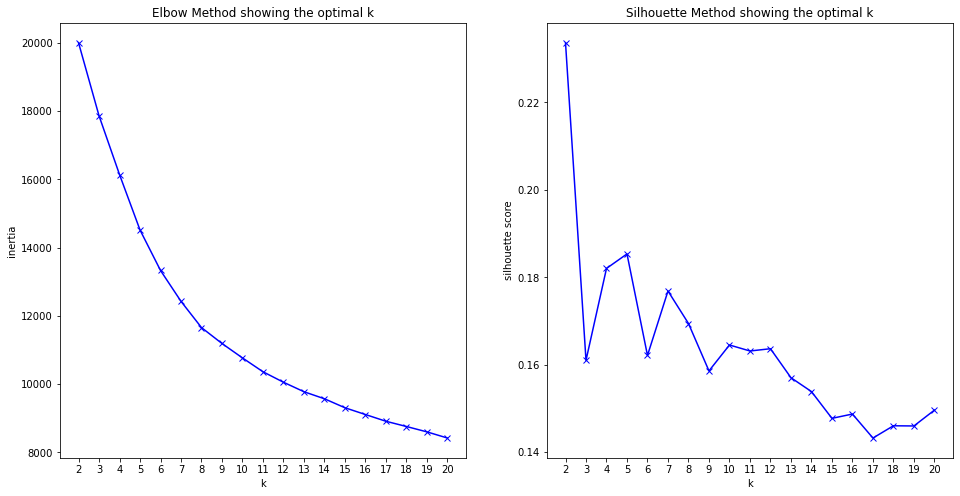

In [28]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "models/kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

### 3.2. Clustering with DBSCAN 

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score

In [48]:
def db_scanner():
    eps_list = np.arange(0.1, 0.55, 0.05)
    min_samples_list = [i for i in range (1,6)]
    for i in eps_list:
        for j in min_samples_list:
            model = DBSCAN(eps=i, min_samples=j)
            model.fit(X)
            yhat = model.fit_predict(X_scaled_df)
            print('Eps =', i, 'and min_samples =', j)
            print("\nThe Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))
            X['cluster'] = yhat
            print('Number of non-noise values:', (X['cluster'] == 0).value_counts()[1], '\n\n')

db_scanner()

Eps = 0.1 and min_samples = 1

The Silhouette score of the model is:  0.07
Number of non-noise values: 1 


Eps = 0.1 and min_samples = 2

The Silhouette score of the model is:  -0.49
Number of non-noise values: 2 


Eps = 0.1 and min_samples = 3

The Silhouette score of the model is:  -0.44
Number of non-noise values: 3 


Eps = 0.1 and min_samples = 4

The Silhouette score of the model is:  -0.36
Number of non-noise values: 5 


Eps = 0.1 and min_samples = 5

The Silhouette score of the model is:  -0.06
Number of non-noise values: 5 


Eps = 0.15000000000000002 and min_samples = 1

The Silhouette score of the model is:  0.08
Number of non-noise values: 1 


Eps = 0.15000000000000002 and min_samples = 2

The Silhouette score of the model is:  -0.48
Number of non-noise values: 2 


Eps = 0.15000000000000002 and min_samples = 3

The Silhouette score of the model is:  -0.44
Number of non-noise values: 3 


Eps = 0.15000000000000002 and min_samples = 4

The Silhouette score of the model i

In [51]:
models = {}

for value in np.arange(0.2, 0.50, 0.01):
    model = DBSCAN(eps=value, min_samples=5)
    yhat = model.fit_predict(X_scaled_df)
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

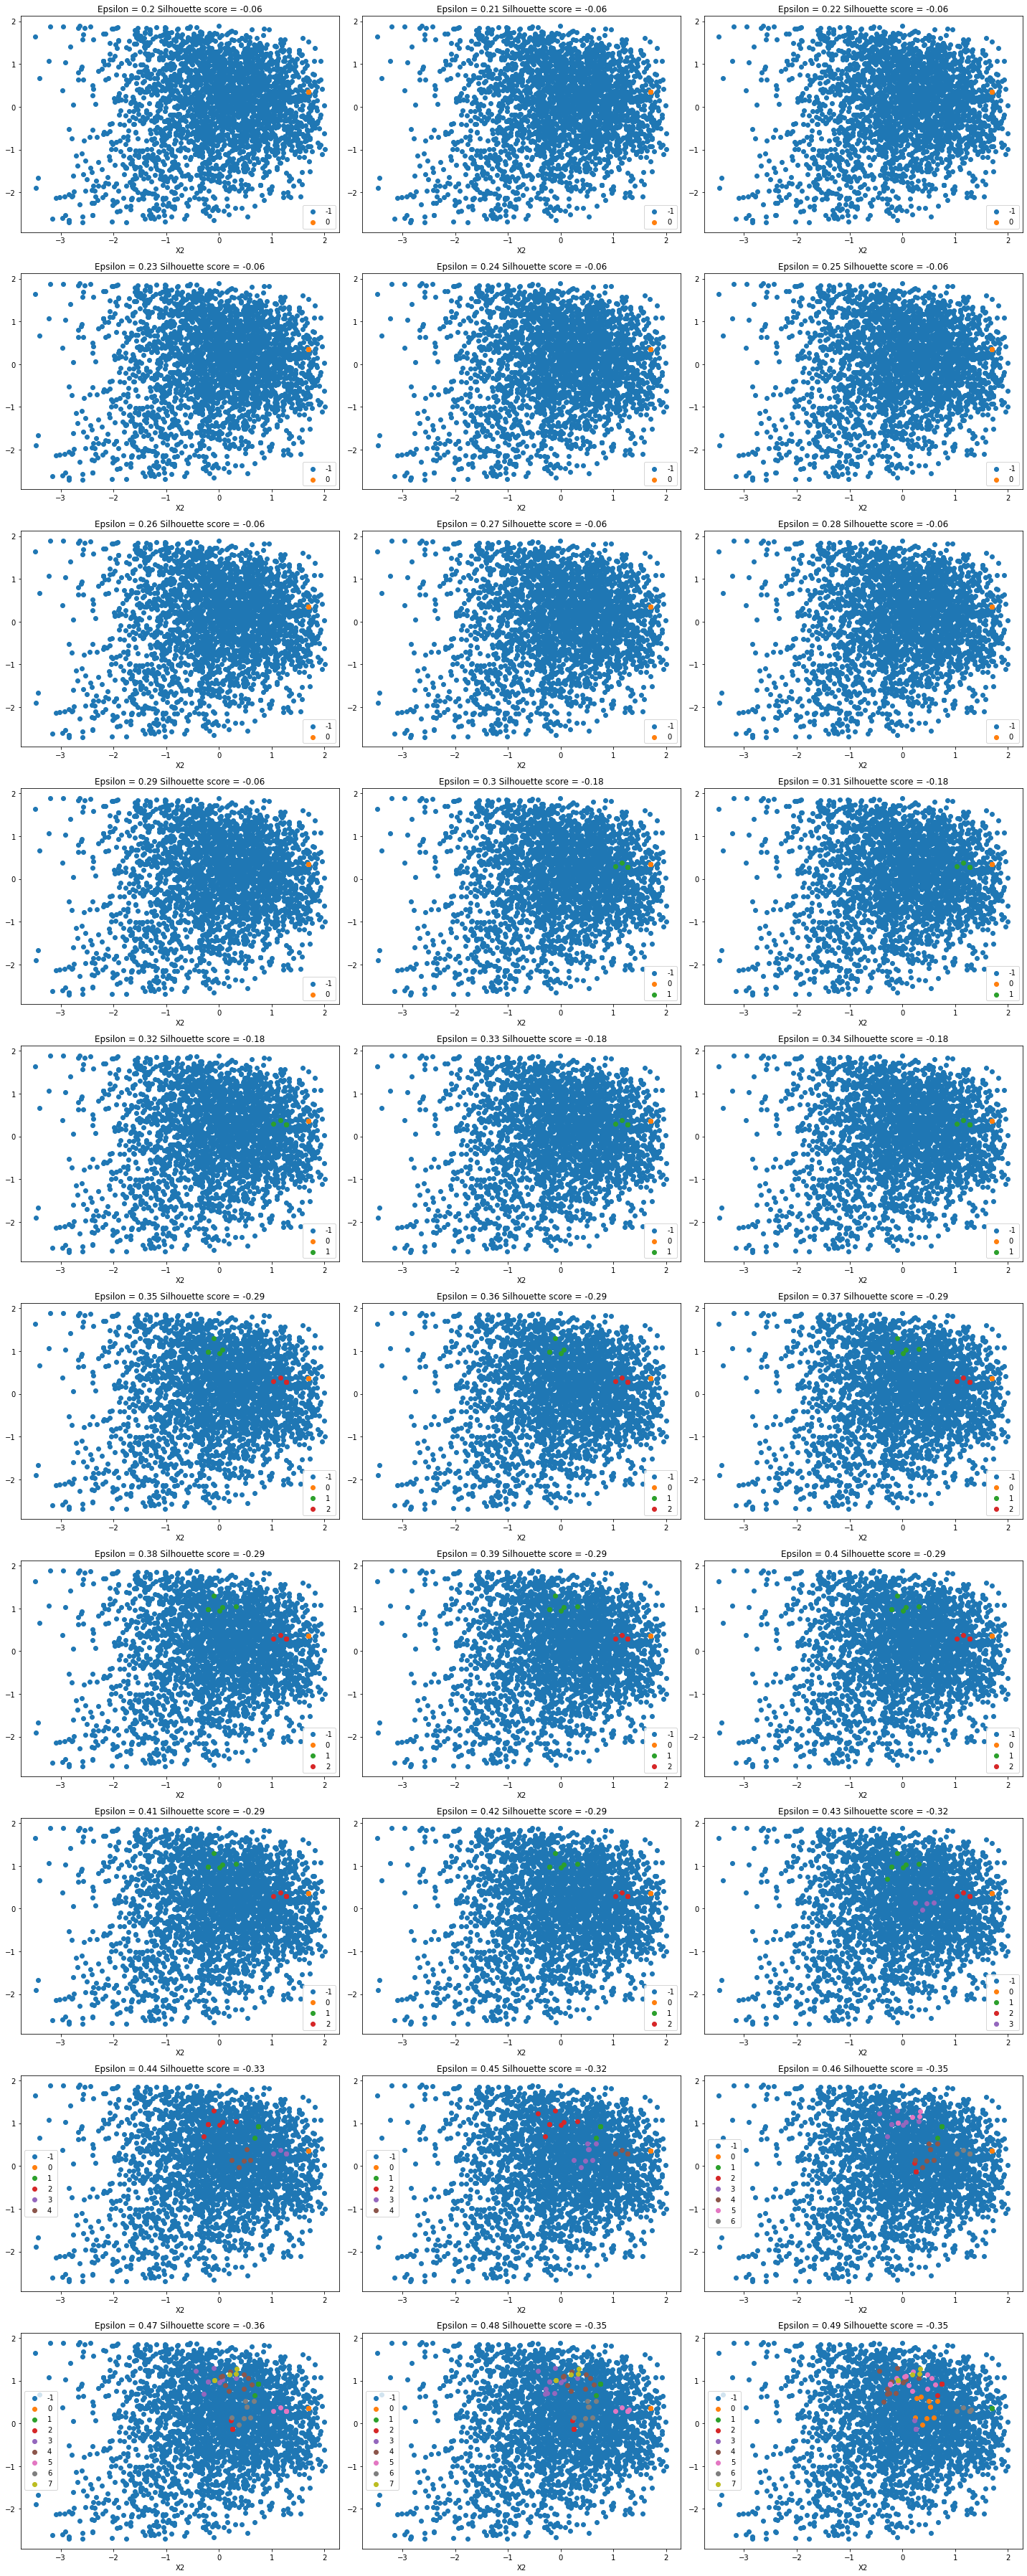

In [52]:
n_rows = int(len(list(models.keys()))/3)
fig, ax = plt.subplots(n_rows,3, figsize=(20,50))
for index, item in enumerate(list(models.items())):
    row_index = int(np.modf(index/3)[1])
    if ( round(np.modf(index/3)[0],1) == 0 ):
        col_index = 0
    elif ( round(np.modf(index/3)[0],1) == 0.3 ):
        col_index = 1
    else:
        col_index = 2
    for cluster in list(np.unique(item[1]['yhat'])):
        row_ix = np.where(item[1]['yhat'] == cluster)[0]
        x_values, y_values = list(X_scaled_df.iloc[row_ix,0].values), list(X_scaled_df.iloc[row_ix,1].values)
        ax[row_index, col_index].scatter(x_values, y_values, label=str(cluster))
        ax[row_index, col_index].set_xlabel("X1")
        ax[row_index, col_index].set_xlabel("X2")
        ax[row_index, col_index].set_title("Epsilon = "+item[0].split("_")[1]+" Silhouette score = "+str(item[1]['score']))
        ax[row_index, col_index].legend()
plt.tight_layout()
plt.show()

### 4. Choosing a Model

K-Means looks to be the better model in this case. Possibly because songs are similar and is not 100% posible to get defined clear groups, in witch case DBSCAN would be better. We can see a lot of noise in DBSCAN. 

Looking the graphs,  the most optimal value of K will be 7 or 8. 7 have a little more inertia, 12427, but it have a much bigger silhouette value. So we choose 7: model 'kmeans_7.pickle'

### 5. Exporting Data

### Scaled

In [73]:
song_recomender_data_scaled = pd.concat([data[['title','artist','id','source']],X_scaled_df],axis=1)
song_recomender_data_scaled.head()

,title,artist,id,source,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Kill Bill,SZA,2ty6DmPnxVPpEFuB23XM0x,H,0.207348,0.968217,-0.757860,-0.751304,0.456383,-0.387441,0.195795,-0.723617
1,Creepin',"Metro Boomin, The Weeknd & 21 Savage",4CpujwKsq4DxOIMiKr12m8,H,0.508733,-1.377985,-0.553805,0.752235,2.602299,-0.441165,-1.307448,-0.778507
2,Anti-Hero,Taylor Swift,2d3d9xZutJjmUpntiyHt3F,H,-0.118147,-1.196793,-0.717215,1.154816,-0.450380,0.075930,-0.275811,-0.826666
3,Unholy,Sam Smith & Kim Petras,2nCTOlmH43oR4DqI6xlCpm,H,-0.353227,0.229512,-0.733805,0.656707,-0.452674,0.190094,1.168481,-0.992342
4,Die For You,The Weeknd,6P8qQd1CFkWnaJoykXZNLi,H,-0.250756,-0.286188,-0.558782,-0.506684,-0.452674,-0.179260,-0.031586,0.412033


In [74]:
song_recomender_data_scaled.to_csv('files_exported/song_recomender_data_scaled.csv',index=False)

### Not Scaled

In [71]:
song_recomender_data = pd.concat([data[['title','artist','id','source']],X],axis=1)
song_recomender_data.head()

,title,artist,id,source,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Kill Bill,SZA,2ty6DmPnxVPpEFuB23XM0x,H,0.678,0.798,0.0316,0.0383,0.269000,0.126,0.509,99.941,1
1,Creepin',"Metro Boomin, The Weeknd & 21 Savage",4CpujwKsq4DxOIMiKr12m8,H,0.728,0.293,0.0562,0.4790,0.904000,0.118,0.152,98.302,2
2,Anti-Hero,Taylor Swift,2d3d9xZutJjmUpntiyHt3F,H,0.624,0.332,0.0365,0.5970,0.000679,0.195,0.397,96.864,5
3,Unholy,Sam Smith & Kim Petras,2nCTOlmH43oR4DqI6xlCpm,H,0.585,0.639,0.0345,0.4510,0.000000,0.212,0.740,91.917,1
4,Die For You,The Weeknd,6P8qQd1CFkWnaJoykXZNLi,H,0.602,0.528,0.0556,0.1100,0.000000,0.157,0.455,133.851,0


In [72]:
song_recomender_data.to_csv('files_exported/song_recomender_data.csv',index=False)